In [197]:
!pip install imutils


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [198]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils

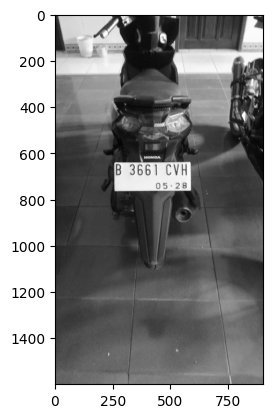

In [199]:
image = cv2.imread('plat.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

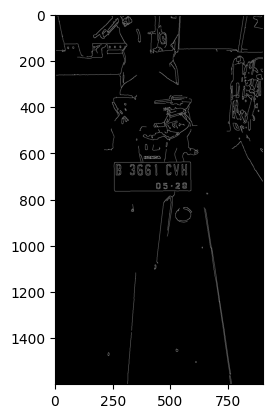

In [200]:
b_filter = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(b_filter, 30, 200)
plt.imshow(edged, cmap='gray')

In [201]:
key_point = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(key_point)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

In [202]:
location = None
for contour in contours :
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [203]:
location

array([[[586, 643]],

       [[586, 764]],

       [[257, 762]],

       [[260, 641]]], dtype=int32)

In [204]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(image, image, mask=mask)

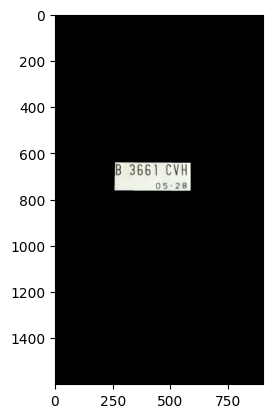

In [205]:
plt.imshow(new_image, cmap='gray')

In [206]:
x, y = np.where(mask == 255)
x1, y1 = np.min(x), np.min(y)
x2, y2 = np.max(x), np.max(y)
cropped_image = gray[x1:x2 + 1, y1:y2 +1]

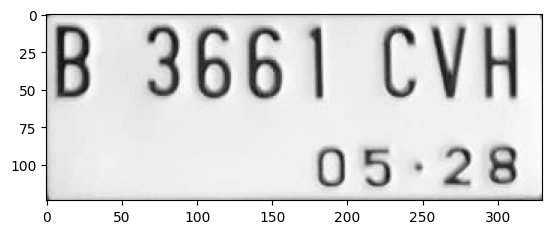

In [207]:
plt.imshow(cropped_image, cmap='gray')

In [208]:
cropped_edge = cv2.Canny(cropped_image, 30, 200)
thresh, binary = cv2.threshold(cropped_image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

Text(0.5, 1.0, 'citrabiner')

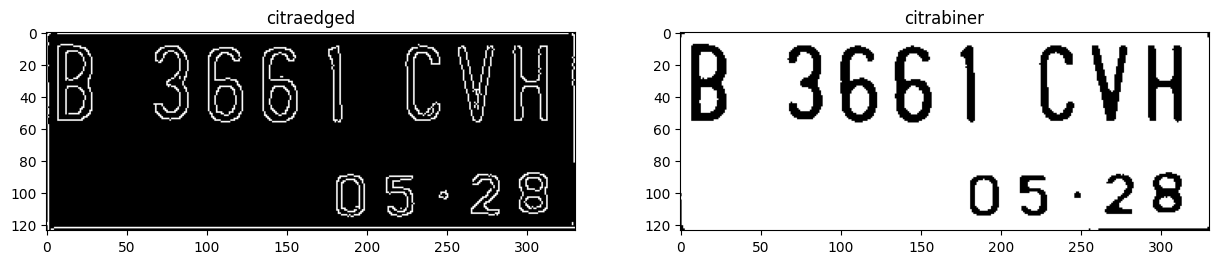

In [209]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs = axs.ravel()

axs[0].imshow(cropped_edge, cmap='gray')
axs[0].set_title('citraedged')

axs[1].imshow(binary, cmap='gray')
axs[1].set_title('citrabiner')

In [210]:
cv2.imwrite('platcitraedged.jpg', cropped_edge)
cv2.imwrite('platcitrabiner.jpg', binary)

True